### 🟢 Minimundo 3 — Produção de Energia Renovável
|  **Contexto:** O governo monitora a geração solar e eólica em diferentes municípios.

**Tarefas:**
* Calcular o percentual de energia renovável.
* Exibir gráfico de dispersão entre energia solar e eólica.
* Criar heatmap de geração total por município.

**Bibliotecas:** Pandas, Seaborn.

**Arquivo:** `energia_municipios.json`


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

energia_municipios_db = pd.read_json('dados/energia_municipios.json')
df = pd.DataFrame(energia_municipios_db)
display(df)


,municipio,solar_mwh,eolica_mwh
0,Uberlândia,220,80
1,Montes Claros,130,40
2,Poços de Caldas,90,20


* Calcular o percentual de energia renovável.

In [25]:
energiaSolar = df['solar_mwh']
list(energiaSolar)
energiaEolica = df['eolica_mwh']
list(energiaEolica)

# Função para exibir o DataFrame
def displau (df):
    display (df)


# Adiciona a nova coluna 'total_mwh' com a soma de energia solar e eólica
for i in range(len(energiaSolar)):
    total = energiaSolar[i] + energiaEolica[i]
    df.at[i, 'total_mwh'] = total

df['porcent_solar_total'] = round((df['solar_mwh'] / df['total_mwh']) * 100, 2).astype(str) + '%'
df['porcent_eolica_total'] = round((df['eolica_mwh'] / df['total_mwh']) * 100, 2).astype(str) + '%'
#df['porcent_solar_total'] = '%' + df['porcent_solar_total'].astype(str)

displau(df)

,municipio,solar_mwh,eolica_mwh,total_mwh,porcent_solar_total,porcent_eolica_total
0,Uberlândia,220,80,300.0,73.33%,26.67%
1,Montes Claros,130,40,170.0,76.47%,23.53%
2,Poços de Caldas,90,20,110.0,81.82%,18.18%


* Exibir gráfico de dispersão entre energia solar e eólica.

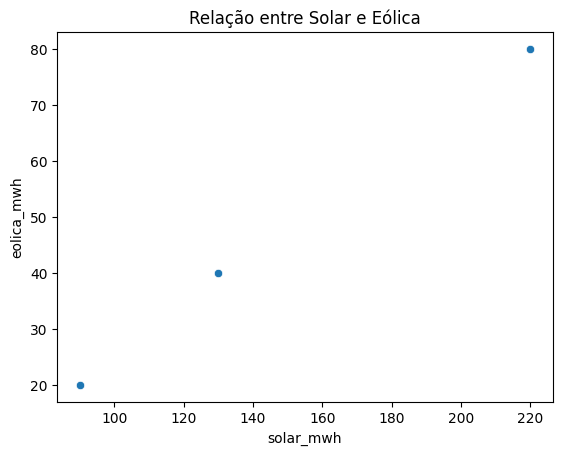

In [26]:
sns.scatterplot(data=df, x='solar_mwh', y='eolica_mwh')
plt.title('Relação entre Solar e Eólica')
plt.show()

* Criar heatmap de geração total por município.

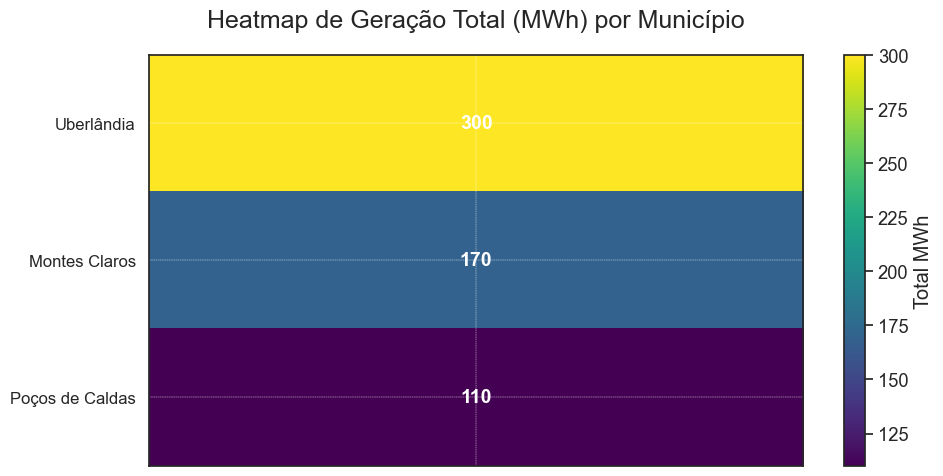

In [ ]:
# Calcular geração total
df['total_mwh'] = df['solar_mwh'] + df['eolica_mwh']

# Configurar dados
heatmap_values = df[['total_mwh']].values
municipios = df['municipio'].tolist()

plt.figure(figsize=(10, 5))

# Plot heatmap
plt.imshow(heatmap_values, cmap='viridis', aspect='auto')

# Colorbar
cbar = plt.colorbar()
cbar.set_label('Total MWh')

# Tick labels (no NumPy)
plt.yticks(range(len(municipios)), municipios, fontsize=12)
plt.xticks([0], [''], fontsize=12)

# Title
plt.title('Heatmap de Geração Total (MWh) por Município', fontsize=18, pad=20)

# Add annotations (no NumPy needed)
for i in range(len(heatmap_values)):
    plt.text(
        0, i,
        str(int(heatmap_values[i][0])),
        ha='center', va='center',
        fontsize=14, color='white', fontweight='bold'
    )

# Style adjustments
plt.grid(color='white', linestyle='--', linewidth=0.3)
plt.tight_layout()

plt.show()
